In [22]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [23]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-30 16:33:55--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.003s  

2024-01-30 16:33:55 (13.7 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [24]:
dataset.dropna(inplace=True)

y = dataset.pop('expenses')



In [25]:
dataset['sex'] = dataset['sex'].astype('category').cat.codes
dataset['smoker'] = dataset['smoker'].astype('category').cat.codes
dataset['region'] = dataset['region'].astype('category').cat.codes
dataset

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

In [31]:
model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [33]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=30)

Epoch 1/30
34/34 [==============================] - 1s 5ms/step - loss: 13050.7441 - mean_absolute_error: 13050.7441 - mean_squared_error: 313928480.0000
Epoch 2/30
34/34 [==============================] - 0s 5ms/step - loss: 8381.9502 - mean_absolute_error: 8381.9502 - mean_squared_error: 178455824.0000
Epoch 3/30
34/34 [==============================] - 0s 5ms/step - loss: 7346.9956 - mean_absolute_error: 7346.9956 - mean_squared_error: 152597808.0000
Epoch 4/30
34/34 [==============================] - 0s 5ms/step - loss: 7199.4751 - mean_absolute_error: 7199.4751 - mean_squared_error: 153781424.0000
Epoch 5/30
34/34 [==============================] - 0s 5ms/step - loss: 7076.6113 - mean_absolute_error: 7076.6113 - mean_squared_error: 154959408.0000
Epoch 6/30
34/34 [==============================] - 0s 5ms/step - loss: 6901.3120 - mean_absolute_error: 6901.3120 - mean_squared_error: 157095536.0000
Epoch 7/30
34/34 [==============================] - 0s 5ms/step - loss: 6732.5024 - me

9/9 - 0s - loss: 3288.1177 - mean_absolute_error: 3288.1177 - mean_squared_error: 37863168.0000 - 212ms/epoch - 24ms/step
Testing set Mean Abs Error: 3288.12 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


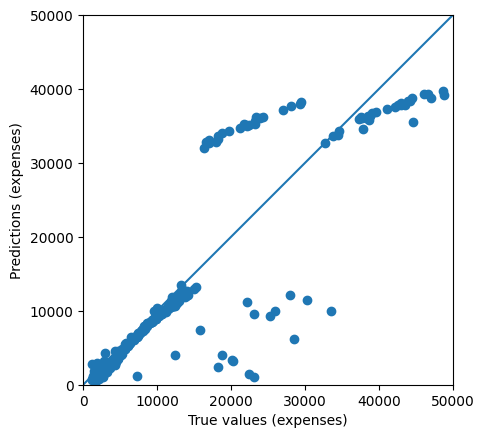

In [34]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
